Escreva seu nome: <font color=red>Gianluca Lazzaris Giudici</font>

# SIMULADO para Avaliação Intermediária

## Ciência dos Dados - 2019.2

# Q1 e Q2 Análise do ENEM

Esta parte da avaliação se baseia em uma amostra de dados do **ENEM 2017** adaptados para esta prova. O dicionario de dados encontra-se no link a seguir:

[Dicionário de dados](./DATA_DIC.html)

In [61]:
#bibliotecas que serão utilizadas:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from scipy.stats import binom
from scipy.stats import uniform, expon, norm, probplot, percentileofscore # Tirar os imports na versão estudante

In [5]:
filename = "enem2017_30K.csv"
dados = pd.read_csv(filename, index_col=0)
dados.head(3)

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_ST_CONCLUSAO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,...,CARRO,CELULAR,FIXO,COMPUTADOR,INTERNET,Q026,TIPO_EM,RENDA,NOTA_TESTES,NOTA_ENEM
171957,170003469518,MT,26.0,F,0.0,1,0,605.4,657.4,542.4,...,A,E,A,B,A,A,C,3020.091575,2430.9,2990.9
127898,170005286919,CE,17.0,M,0.0,2,0,698.5,649.0,630.6,...,C,B,A,B,B,B,D,3611.589780,2817.1,3677.1
132925,170005113172,MA,21.0,M,0.0,1,0,591.0,643.8,597.9,...,A,D,A,B,B,A,A,1375.454182,2385.8,3325.8


## 1. Vamos investigar as notas do ENEM.
(2 pontos)

___


**1a.** Visualize as notas do ENEM apresentado um histograma de densidade de frequência **(0,25)**

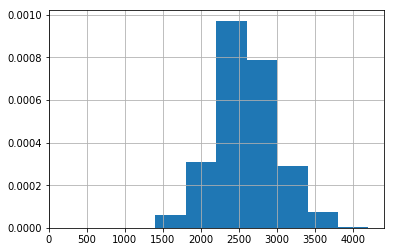

In [6]:
dados.NOTA_ENEM.hist(density=True);

**1b.** Verifique graficamente usando um recurso diferente do item anterior se a distribuição normal é um modelo adequado para as notas do ENEM. Apresente uma conclusão. **(0,5)**

Dica de simulado: use o `probplot` visto nas aulas de distribuições Exponencial e Normal.   

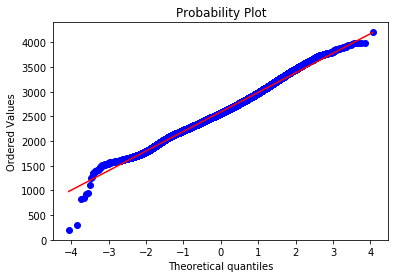

In [7]:
probplot(dados.NOTA_ENEM, dist="norm" , plot=plt);

**Conclusão: no probplot os dados estão bem alinhados à diagonal. É um bom ajuste. As discrepâncias estão bem longe do centro, que concentra a maior probabilidade**

**1c.** Supondo então que a distribuição normal é aceitável, realize o ajuste das notas do ENEM por uma normal. Aqui, calcule a média e desvio padrão para estimarem $\mu$ e $\sigma$, respectivamente.  **(0,50)**

Dica de simulado: a função de fazer ajuste é a `fit`.

In [8]:
mu, sigma = norm.fit(dados.NOTA_ENEM)
mu, sigma

(2591.8313599999997, 396.88283964063885)

**1d.** Visualize a normal plotada no item acima sobre o histograma de densidade e avalie a qualidade do ajuste . **(0,25)**

Dica de simulado: veja o gabarito das aulas de contínuas para ver como se plota uma função de densidade de probabilidade sobre um histograma. 

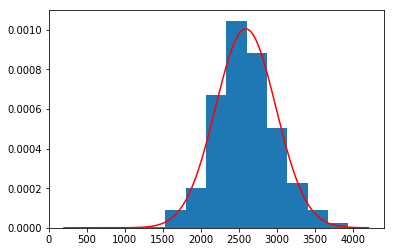

In [9]:
x = np.linspace(min(dados.NOTA_ENEM), max(dados.NOTA_ENEM), 1000)
y = norm.pdf(x, loc=mu, scale=sigma)

plt.figure();
plt.hist(dados.NOTA_ENEM, density=True, bins=15);
plt.plot(x, y, 'r-');
plt.show();

**R.: Na faixa de maior probabilidade o ajuste parece bom .**

**1e.** Qual é o maior valor de nota do ENEM entre 70% das menores notas? Responda com base nos dados **(0,50)**

In [15]:
dados.NOTA_ENEM.quantile(q=0.7) # maneira mais simples, talvez aproximada mas que o professor aceitará. 

2775.0

In [17]:
# maneira que da o numero exato:

quantidade=np.int(len(dados.NOTA_ENEM)*0.7) #Quantidade de alunos referente a 70% menores notas

dados.NOTA_ENEM.sort_values().iloc[(quantidade-1)] #subtrai 1 porque índice da posição da linha inicia em zero

2775.0

## 2. Fatores sociais e regionais

(3 pontos)

___

**2a.** Ainda usando os dados do ENEM, apresente uma tabela cruzada que mostre a escolaridade do pai cruzada com o tipo do ensino médio. Aponte a combinação de categorias mais frequente e, baseado no dicionário de dados, explique o significa esta combinação de categorias. **(1,00)**

In [18]:
pd.crosstab(dados.ESC_PAI, dados.TIPO_EM, normalize=True)

TIPO_EM,A,B,C,D,E
ESC_PAI,,,,,
A,0.050333,0.000633,0.000567,0.000633,0.000467
B,0.205233,0.003933,0.002600,0.004367,0.002533
C,0.132233,0.003567,0.002067,0.006300,0.002733
D,0.104500,0.004233,0.001700,0.009967,0.003200
E,0.182200,0.012200,0.004833,0.044667,0.010700
F,0.030333,0.004200,0.001133,0.033333,0.004600
G,0.011933,0.002533,0.000567,0.026533,0.002567
H,0.076433,0.002500,0.000900,0.004433,0.001600


**R.:O crosstab mostra que  20.53%  das pessoas têm pai com escolaridade B, ou seja, não completou o 5.o ano do fundamental ao mesmo tempo que tipo do ensino médio é A, ou seja, estuda em escola pública.**

**2b.** Avalie a afirmação: *pessoas com mais renda* tendem a ir melhor no ENEM **(1,00)**

É necessário:

* realizar o plot de dispersão renda versus pontuação
* realizar um ajuste de retas
* Medir com um número o quanto as variáveis *RENDA* e *NOTA_ENEM* variam conjuntamente e discutir o plot.

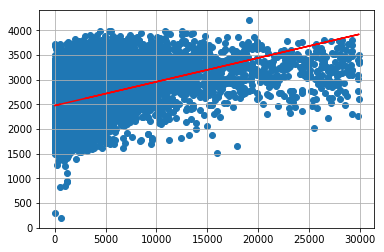

In [24]:
from numpy.polynomial.polynomial import polyfit

plt.scatter(dados.RENDA, dados.NOTA_ENEM)

x = dados.RENDA
y = dados.NOTA_ENEM

b, m = polyfit(x, y, 1)

plt.plot(x, b +  m * x, '-', color="red")
plt.grid(True)
plt.show()

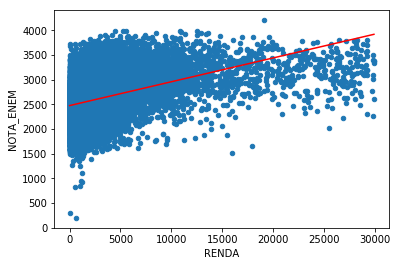

In [25]:
#maneira do professor:

#Coloca os pontos em azul - Gráfico de dispersão
dados.plot.scatter(x="RENDA", y="NOTA_ENEM") 

#Cálculo dos coeficientes da reta
a = dados.RENDA.cov(dados.NOTA_ENEM)/dados.RENDA.var() #Obtenção da inclinação (coeficiente angular)
b = dados.NOTA_ENEM.mean() - a*dados.RENDA.mean() #Obtenção do intercepto (coeficiente linear)

#Para adicionar a reta ao gráfico
plt.plot((dados.RENDA.min(), dados.RENDA.max()), 
         (a*dados.RENDA.min() + b, a*dados.RENDA.max() + b), color='red');

In [26]:
dados.RENDA.corr(dados.NOTA_ENEM)

0.40819007923966166

**2c.** Assuma que todos os que têm $NOTA\_ENEM>3482$ são aceitos em Medicina. A partir dos dados, calcule a probabilidade de que uma pessoa que foi aceita em Medicina seja de São Paulo. Ou seja, calcule $P(SP|aceito)$. **(0,50)**

In [27]:
#Uma maneira:
dados[dados.NOTA_ENEM > 3482].SG_UF_RESIDENCIA.value_counts(True)["SP"]

0.18666666666666668

In [31]:
#outra maneira mais passo a passo:
aceito = dados[dados["NOTA_ENEM"] > 3482]
len(aceito)

600

In [33]:
aceitos_de_sp = aceito[aceito["SG_UF_RESIDENCIA"] == "SP"]
len(aceitos_de_sp)

112

In [35]:
probabilidade = len(aceitos_de_sp)/len(aceito)
probabilidade

0.18666666666666668

**2d.** Calcule a probabilidade de alguém do Acre ser aceito em  medicina. **(0,5)**

In [36]:
#vizualizando os dados para ficar mais claro:

dados[dados.NOTA_ENEM > 3482].SG_UF_RESIDENCIA.value_counts(True)

MG    0.190000
SP    0.186667
RJ    0.101667
CE    0.061667
GO    0.048333
RS    0.040000
PR    0.038333
BA    0.035000
PB    0.033333
DF    0.030000
PE    0.030000
PA    0.028333
SE    0.025000
ES    0.025000
PI    0.023333
SC    0.018333
MA    0.016667
AL    0.015000
RN    0.011667
MS    0.011667
MT    0.010000
AM    0.008333
TO    0.003333
AP    0.003333
RO    0.003333
AC    0.001667
Name: SG_UF_RESIDENCIA, dtype: float64

In [37]:
#Outra maneira considerando que P(A|B)=P(A e B)/P(B) 
#Note que seria redundante dividir numerador e denominador por `len(dados)`
len(dados[(dados.SG_UF_RESIDENCIA=="SP")&(dados.NOTA_ENEM > 3482)])/len(dados[(dados.NOTA_ENEM > 3482)])

0.18666666666666668

In [38]:
#Quantidade total de alunos na base de dados
len(dados)

30000

In [40]:
#Probabilidade de uma pessoa do acre passar em medicina:
#Uma maneira
len(dados[(dados.NOTA_ENEM > 3482) & (dados.SG_UF_RESIDENCIA =="AC")])/len(dados)

3.3333333333333335e-05

In [43]:
#Outra maneira mais passo a passo de calcular a probabilidade de os do acre passarem em medicina:

do_acre = dados[dados["SG_UF_RESIDENCIA"] == "AC"] 

med_do_acre = do_acre[do_acre["NOTA_ENEM"] > 3482]

probabilidade = len(med_do_acre)/len(do_acre)
probabilidade

0.004830917874396135

# Q3. Análise de texto

(3.5 pontos)
___


Este exercício é baseado na análise dos scripts do filme [The Godfather](https://www.awesomefilm.com/script/THEGODFATHER.txt), e que está no arquivo `roteiro.txt`

Leia o arquivo `roteiro.txt` .

Assuma em seus cálculos que a diferença entre letras maiúsculas e minúsculas não importa.

Não se preocupe com o *cleanup*

In [46]:
filename = "roteiro.txt"

In [47]:
file = open(filename, "r")

In [48]:
texto  = file.read()

Pede-se:

**a.** Apresente a tabela de frequências relativas deste roteiro (1.5 pontos)

In [49]:
texto = texto.lower().split()

In [50]:
serie = pd.Series(texto)

In [51]:
f_relativa = serie.value_counts(True)

**probabilidades do tipo  P(palavra|roteiro):**

In [52]:
f_relativa

the           0.057716
and           0.025930
a             0.023297
to            0.022770
he            0.015676
of            0.015583
in            0.014932
is            0.013972
you           0.012268
michael       0.011586
his           0.011122
i             0.010037
with          0.007838
don           0.007063
on            0.006970
they          0.005576
corleone      0.005236
are           0.005143
for           0.005112
at            0.004926
we            0.004833
hagen         0.004740
it            0.004740
sonny         0.004709
day:          0.004647
then          0.004368
that          0.004337
my            0.004306
as            0.004151
out           0.003996
                ...   
gone,         0.000031
question.     0.000031
sweat         0.000031
turns.        0.000031
poor          0.000031
unzips,       0.000031
pile          0.000031
grand?        0.000031
wax.          0.000031
resisted;     0.000031
necessary?    0.000031
amazement;    0.000031
excitedly, 

**b.** Assuma que as suposições de independência que fazemos para o *Naive Bayes* são válidas. (2 pontos)

Dada a frase `"Are you talking to me?"` 

Calcule $P(frase| roteiro)$

In [53]:
# Uma maneira:
frase = "Are you talking to me".lower()

In [54]:
P_frase_roteiro = f_relativa[frase.split()].prod()

In [56]:
P_frase_roteiro

1.0795730035716693e-12

# Q4. Probabilidade discreta - erros em impressão 3D

(1.5 pontos)
___


O que é?
A impressão inclinada é um dos erros de impressão que ocorre quando o conjunto de extrusão se move menos do que o esperado, devido à uma resistência na movimentação da cabeça de impressão.

![](robozinho.png)

Fonte: https://3dlab.com.br/20-principais-erros-de-impressao/


Em uma faculdade de engenharia, o percentual de peças feitas em impressora 3D que apresentam erro de impressão inclinada é de 0,5%.
Considere que, durante um semestre do curso de engenharia, os alunos irão imprimir 29 peças. 


(1,0 ponto) Calcule a probabilidade de que haja peça(s) com erro de impressão inclinada até o final do semestre. 

**Resposta:**

In [63]:
# Uma maneira:
n=29
p=0.005
1-binom.cdf(0, n=n, p=p)

0.1352922694324663

In [65]:
#uma maneira mais trivial:

1-(1 - 0.005)**29        #29 = numero de pecas, probabilidade de erro = 0.005, total = 1

0.1352922694324663